In [58]:
import numpy as np
import pandas as pd
import math

In [59]:
df = pd.read_csv('features.csv', encoding='latin-1')
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,Pop_Total,Desemprego,TFEB_Total,TFEB_0_3,TFEB_4_5,...,TA15M_GI_55_64,TA15M_GI_65_M,IPDPE_TodosNiveis,IPDPE_EB,IPDPE_EI,IPDPE_1_4_Serie,IPDPE_5_8_Series,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2831.0,2357.0,2973.0,2259.0,2367.0,2274.0,25845.0,11.0
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2926.0,2439.0,2653.0,2235.0,2579.0,2557.0,25539.0,10.5
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2903.0,2405.0,2484.0,2633.0,2484.0,1723.0,23653.0,9.8
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2852.0,2395.0,2832.0,2528.0,2395.0,1911.0,20669.0,8.6
4,2004,Luiz InÃ¡cio Lula da Silva,PT,Tarso Genro,PT,NaN,NaN,31.7,13.4,61.5,...,23.5,34.4,3024.0,2586.0,2850.0,2889.0,2670.0,1745.0,19567.0,7.6
5,2005,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,31.2,13.0,62.8,...,22.6,33.8,3221.0,2730.0,2650.0,3095.0,2880.0,1850.0,21083.0,7.7
6,2006,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,31.2,15.4,67.5,...,20.8,32.1,3832.0,3329.0,2896.0,3467.0,3785.0,2571.0,21826.0,6.6
7,2007,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,30.7,17.0,70.0,...,19.8,31.3,4475.0,3897.0,3510.0,4075.0,4301.0,3119.0,23062.0,5.9
8,2008,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,30.2,18.1,72.7,...,19.0,30.8,5066.0,4475.0,3750.0,4695.0,5007.0,3609.0,21317.0,4.8
9,2009,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,NaN,NaN,29.8,18.4,74.8,...,17.9,30.8,5572.0,4899.0,3756.0,5297.0,5530.0,3805.0,23941.0,4.9


In [60]:
df['TDsp'] = (df['Desemprego']/df['Pop_Total']) * 100
df = df.drop(columns=['Desemprego', 'Pop_Total'])
df

,Ano,Presidente,Partido_Pres,Min_Educacao,Partido_Min,TFEB_Total,TFEB_0_3,TFEB_4_5,TFEB_6_10,TFEB_11_14,...,TA15M_GI_65_M,IPDPE_TodosNiveis,IPDPE_EB,IPDPE_EI,IPDPE_1_4_Serie,IPDPE_5_8_Series,IPDPE_EM,IPDPE_ES,IPDPE_Prop_ES_Sobre_EB,TDsp
0,2000,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,NaN,2831.0,2357.0,2973.0,2259.0,2367.0,2274.0,25845.0,11.0,NaN
1,2001,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,NaN,2926.0,2439.0,2653.0,2235.0,2579.0,2557.0,25539.0,10.5,NaN
2,2002,Fernando Henrique Cardoso,PSDB,Paulo Renato Souza,PSDB,NaN,NaN,NaN,NaN,NaN,...,NaN,2903.0,2405.0,2484.0,2633.0,2484.0,1723.0,23653.0,9.8,NaN
3,2003,Fernando Henrique Cardoso,PSDB,Cristovam Buarque,PT,NaN,NaN,NaN,NaN,NaN,...,NaN,2852.0,2395.0,2832.0,2528.0,2395.0,1911.0,20669.0,8.6,NaN
4,2004,Luiz InÃ¡cio Lula da Silva,PT,Tarso Genro,PT,31.7,13.4,61.5,95.9,96.4,...,34.4,3024.0,2586.0,2850.0,2889.0,2670.0,1745.0,19567.0,7.6,NaN
5,2005,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,31.2,13.0,62.8,96.4,96.7,...,33.8,3221.0,2730.0,2650.0,3095.0,2880.0,1850.0,21083.0,7.7,NaN
6,2006,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,31.2,15.4,67.5,96.9,96.9,...,32.1,3832.0,3329.0,2896.0,3467.0,3785.0,2571.0,21826.0,6.6,NaN
7,2007,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,30.7,17.0,70.0,97.0,97.0,...,31.3,4475.0,3897.0,3510.0,4075.0,4301.0,3119.0,23062.0,5.9,NaN
8,2008,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,30.2,18.1,72.7,97.6,97.3,...,30.8,5066.0,4475.0,3750.0,4695.0,5007.0,3609.0,21317.0,4.8,NaN
9,2009,Luiz InÃ¡cio Lula da Silva,PT,Fernando Haddad,PT,29.8,18.4,74.8,97.7,97.5,...,30.8,5572.0,4899.0,3756.0,5297.0,5530.0,3805.0,23941.0,4.9,NaN


In [61]:
print(df.columns[5:14])
print(df.columns[14:35])
print(df.columns[35:])

Index(['TFEB_Total', 'TFEB_0_3', 'TFEB_4_5', 'TFEB_6_10', 'TFEB_11_14',
       'TFEB_6_14', 'TFEB_15_17', 'TFEB_18_24', 'TFEB_25_Mais'],
      dtype='object')
Index(['NI25M_Sem', 'NI25M_En_Fun_In', 'NI25M_En_Fun_Com', 'NI25M_En_Med_In',
       'NI25M_En_Med_Com', 'NI25M_En_Sup_In ', 'NI25M_En_Sup_Com', 'TA15M_Ger',
       'TA15M_Urb', 'TA15M_Rur', 'TA15M_H', 'TA15M_M', 'TA15M_Bra',
       'TA15M_Pre_Par', 'TA15M_GI_15_19', 'TA15M_GI_20_24', 'TA15M_GI_25_34',
       'TA15M_GI_35_44', 'TA15M_GI_45_54', 'TA15M_GI_55_64', 'TA15M_GI_65_M'],
      dtype='object')
Index(['IPDPE_TodosNiveis', 'IPDPE_EB', 'IPDPE_EI', 'IPDPE_1_4_Serie',
       'IPDPE_5_8_Series', 'IPDPE_EM', 'IPDPE_ES', 'IPDPE_Prop_ES_Sobre_EB',
       'TDsp'],
      dtype='object')


In [62]:
# Pesos por dado pro cálculo da métrica
IPDPE = 0.005
w = {
    'TDsp': 10,
    'TFEB_Total': 1,
    'TFEB_0_3': 1,
    'TFEB_4_5': 1,
    'TFEB_6_10': 1,
    'TFEB_11_14': 1,
    'TFEB_6_14': 1,
    'TFEB_15_17': 1,
    'TFEB_18_24': 1,
    'TFEB_25_Mais': 1,
    'NI25M_Sem': 1,
    'NI25M_En_Fun_In': 1,
    'NI25M_En_Fun_Com': 1,
    'NI25M_En_Med_In': 1,
    'NI25M_En_Med_Com': 1,
    'NI25M_En_Sup_In ': 1,
    'NI25M_En_Sup_Com': 1,
    'TA15M_Ger': 1,
    'TA15M_Urb': 1,
    'TA15M_Rur': 1,
    'TA15M_H': 1,
    'TA15M_M': 1,
    'TA15M_Bra': 1,
    'TA15M_Pre_Par': 1,
    'TA15M_GI_15_19': 1,
    'TA15M_GI_20_24': 1,
    'TA15M_GI_25_34': 1,
    'TA15M_GI_35_44': 1,
    'TA15M_GI_45_54': 1,
    'TA15M_GI_55_64': 1,
    'TA15M_GI_65_M': 1,
    'IPDPE_TodosNiveis': IPDPE,
    'IPDPE_EB': IPDPE,
    'IPDPE_EI': IPDPE,
    'IPDPE_1_4_Serie': IPDPE,
    'IPDPE_5_8_Series': IPDPE,
    'IPDPE_EM': IPDPE,
    'IPDPE_ES': IPDPE,
    'IPDPE_Prop_ES_Sobre_EB': IPDPE,
}

In [63]:
means = df.mean(axis = 0, skipna = True)
means

Ano                        2010.000000
TFEB_Total                   28.806667
TFEB_0_3                     22.906667
TFEB_4_5                     78.693333
TFEB_6_10                    98.180000
TFEB_11_14                   97.953333
TFEB_6_14                    98.060000
TFEB_15_17                   84.680000
TFEB_18_24                   31.033333
TFEB_25_Mais                  4.720000
NI25M_Sem                     7.500000
NI25M_En_Fun_In              33.950000
NI25M_En_Fun_Com              8.800000
NI25M_En_Med_In               4.150000
NI25M_En_Med_Com             26.550000
NI25M_En_Sup_In               3.500000
NI25M_En_Sup_Com             15.500000
TA15M_Ger                     9.169231
TA15M_Urb                     6.900000
TA15M_Rur                    21.784615
TA15M_H                       9.407692
TA15M_M                       8.930769
TA15M_Bra                     5.607692
TA15M_Pre_Par                12.600000
TA15M_GI_15_19                1.384615
TA15M_GI_20_24           

In [117]:
from itertools import zip_longest

def nearest_non_zero(lst, idx):
    if lst[idx] > 0:
        return lst[idx]
    before, after = lst[:idx], lst[idx+1:]
    for b_val, a_val in zip_longest(reversed(before), after, fillvalue=0):
        # N.B. I applied `reversed` inside `zip_longest` here. This
        # ensures that `before` and `after` are the same type, and that
        # `before + [lst[idx]] + after == lst`.
        if b_val > 0:
            return b_val
        if a_val > 0:
            return a_val
    else:
        return 0  # all zeroes in this list

In [123]:
print(df['TFEB_Total'])
# Procura valor não-nulo mais pró
nearest_non_zero(df['TFEB_Total'], 0)

0      NaN
1      NaN
2      NaN
3      NaN
4     31.7
5     31.2
6     31.2
7     30.7
8     30.2
9     29.8
10     NaN
11    28.6
12    28.0
13    27.9
14    27.2
15    26.8
16    27.5
17    27.3
18    27.1
19    26.9
20     NaN
Name: TFEB_Total, dtype: float64


31.7

In [64]:
def score(line):
    score = 0
    # Não usa as linhas iniciais pro cálculo (não quantitativas)
    for column, val in zip(line.index, line):
        if not isinstance(val, str):
            # Se não tem valor, atribui a média
            if math.isnan(val):
                val = means[column]
            w_val = w[column] * val
            score += w_val
#             print(f'{column}: w_val: {w_val:.2f}, score: {score:.2f}')
    return score

In [65]:
score_governanca = []
score_insercao_pop = []
score_cap_educacional = []

for i in range(len(df)):
    line = df.iloc[i]
    
    insercao_pop = line[5:14]
    cap_educacional = line[14:35]
    governanca = line[35:]
    
    score_governanca.append(score(governanca))
    score_insercao_pop.append(score(insercao_pop))
    score_cap_educacional.append(score(cap_educacional))
    
    print(f'Governança: {score(governanca):.2f}, Inserção Pop.: {score(insercao_pop):.2f}, \
Cap. Educacional: {score(cap_educacional):.2f}')

Governança: 253.26, Inserção Pop.: 545.03, Cap. Educacional: 245.19
Governança: 253.37, Inserção Pop.: 545.03, Cap. Educacional: 245.19
Governança: 240.15, Inserção Pop.: 545.03, Cap. Educacional: 245.19
Governança: 226.63, Inserção Pop.: 545.03, Cap. Educacional: 245.19
Governança: 225.37, Inserção Pop.: 514.60, Cap. Educacional: 286.95
Governança: 236.26, Inserção Pop.: 515.50, Cap. Educacional: 280.35
Governança: 257.24, Inserção Pop.: 524.20, Cap. Educacional: 269.55
Governança: 280.90, Inserção Pop.: 527.10, Cap. Educacional: 262.65
Governança: 288.29, Inserção Pop.: 533.20, Cap. Educacional: 259.25
Governança: 312.70, Inserção Pop.: 536.40, Cap. Educacional: 254.15
Governança: 343.81, Inserção Pop.: 545.03, Cap. Educacional: 245.19
Governança: 369.62, Inserção Pop.: 538.50, Cap. Educacional: 236.45
Governança: 359.09, Inserção Pop.: 539.50, Cap. Educacional: 236.45
Governança: 384.69, Inserção Pop.: 546.20, Cap. Educacional: 233.25
Governança: 384.29, Inserção Pop.: 548.30, Cap. 

(21,)
21


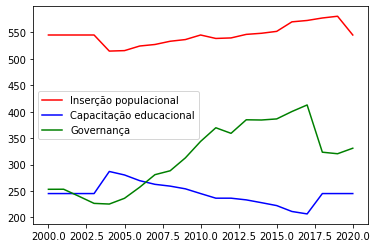

In [99]:
import matplotlib.pyplot as plt
t = np.arange(2000, 2021, 1)
print(t.shape)
print(len(score_insercao_pop))

fig, ax = plt.subplots()

ax.plot(t, score_insercao_pop, 'r', label='Inserção populacional')
ax.plot(t, score_cap_educacional, 'b', label='Capacitação educacional')
ax.plot(t, score_governanca, 'g', label='Governança')

legend = ax.legend(loc='best', shadow=False)

plt.show()

In [109]:
from sklearn.linear_model import LinearRegression
def linear_reg(y_pred):
    X = np.linspace((1,2000), (21,2020), 21)
    reg = LinearRegression().fit(X, y_pred)
    a = reg.coef_[0]
    b = reg.intercept_
    return (a, b)

In [110]:
def plot_reg(score, label):
    fig, ax = plt.subplots()

    ax.plot(t, score, 'r', label=label)
    x = np.arange(2000, 2030, 1)
    a, b = linear_reg(score)
    ax.plot(x, a*x + b, 'g--', label='Regressão linear')

    legend = ax.legend(loc='best', shadow=False)

    plt.show()

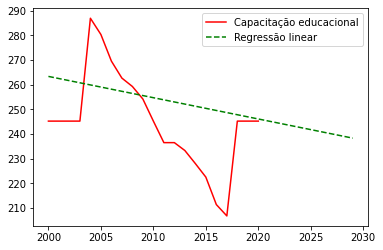

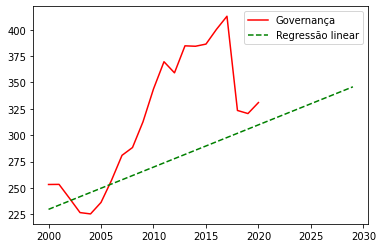

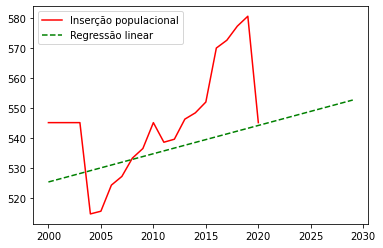

In [111]:
plot_reg(score_cap_educacional, 'Capacitação educacional')
plot_reg(score_governanca, 'Governança')
plot_reg(score_insercao_pop, 'Inserção populacional')